<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Градиентный спуск и линейные модели: домашнее задание</b></h2>

In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [2]:
def f(x1, x2):
    return np.sin(x1)**2 + np.sin(x2) ** 2

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти x1 и x2 такие, что при них значение f(x1,x2) минимально, то есть *точку экстремума*.  
Как мы будем искать эту точку? Используем методы оптимизации (=минимизации в нашем случае). Одним из таких методов и является градиентный спуск. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции f:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны

In [6]:
def grad_descent(lr, num_iter=100):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        param lr: learning rate алгоритма
        param num_iter: количество итераций градиентного спуска
    """
    global f
    # в начале градиентного спуска инициализируем значения x1 и x2 какими-нибудь числами
    cur_x1, cur_x2 = 1.5, -1
    # будем сохранять значения аргументов и значений функции в процессе град. спуска в переменную states
    steps = []
    
    # итерация цикла -- шаг градиентнго спуска
    for iter_num in range(num_iter):
        steps.append([cur_x1, cur_x2, f(cur_x1, cur_x2)])
        
        # чтобы обновить значения cur_x1 и cur_x2, как мы помним с последнего занятия, 
        # нужно найти производные (градиенты) функции f по этим переменным.
        grad_x1 = 2 * np.sin(cur_x1) * np.cos(cur_x1)
        grad_x2 = 2 * np.sin(cur_x2) * np.cos(cur_x2)
                 
        # после того, как посчитаны производные, можно обновить веса. 
        # не забудьте про lr!
        cur_x1 -= lr * grad_x1
        cur_x2 -= lr * grad_x2
    return np.array(steps)

Запустим градиентный спуск:

In [7]:
steps = grad_descent(lr=0.5, num_iter=10)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки x1, x2, f(x1, x2)), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения cur_x1, cur_x2, f(cur_x1, cur_x2) в steps в процессе спуска)

Если у Вас правильно написана функция grad_descent, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения lr и num_iter и получать разные результаты.

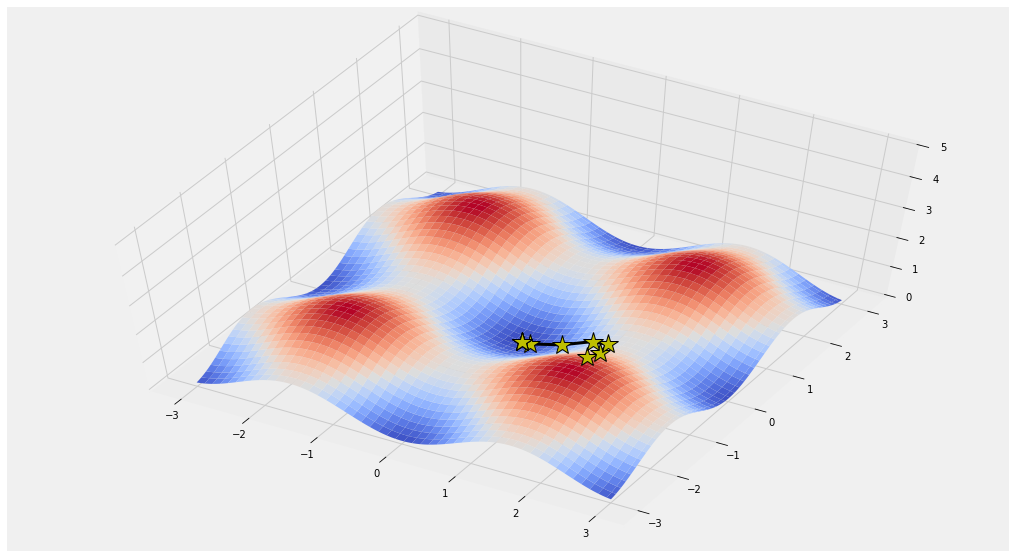

In [8]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2], marker='*', markersize=20,
                markerfacecolor='y', lw=3, c='black')

ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm)
ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

#### Ответ на КР  №1

Запустите Вашу функцию grad_descent c параметрами lr=0.3, num_iter=20 и начальными приближениями  cur_x1, cur_x2 = 1.5, -1. Сумма значений x1, x2 и f(x1, x2) (т.е. сумма значений в steps[-1]), умноженная на 10\**6 и округленная до 2 знаков после запятой, будет ответом на первый вопрос кр.

In [10]:
steps = grad_descent(lr=0.3, num_iter=20)
np.sum(steps[-1]) * 10**6

5.8474610183441325

### 2. Линейные модели

Возьмем код для линейной регресси с семинара. Напомним, что найти веса W и b для линейной регресси можно двумя способами: обращением матриц (функция solve_weights) и градиентным спуском (функция grad_descent). Мы здесь будем рассматривать градиентный спуск.

In [11]:
W = None
b = None

def mse(preds, y):
    return ((preds - y)**2).mean()
    
def grad_descent(X, y, lr, num_iter=100):
    global W, b
    np.random.seed(40)
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

def predict(X):
    global W, b
    return np.squeeze(X @ W + b.reshape(-1, 1))

Рассмотрим функцию:  

$$f(x, y) = 0.43x+0.5y + 0.67$$  

***Friendly reminder:***  
Что мы хотим? Мы хотим уметь "восстанавливать функцию" -- то есть предсказывать значения функции в точках с координатами (x, y) (именно так и получается 3D-график -- (x, y, f(x,y)) в пространстве).  
В чём сложность? Нам дан только конечный небольшой набор точек (30 в данном случае), по которому мы хотим восстановить зависимость, по сути, непрерывную. Линейная регрессия как раз подходит для восстановления линейной зависимости (а у нас функция сейчас как раз линейная -- только сложение аргументов и умножение на число).

Cгерерируем шумные данные из этой функции (как на семинаре):

In [38]:
np.random.seed(40)
func = lambda x, y: (0.43*x + 0.5*y + 0.67 + np.random.normal(0, 7, size=x.shape))

X = np.random.sample(size=(30)) * 10
Y = np.random.sample(size=(30)) * 150
result_train = [func(x, y) for x, y in zip(X, Y)]
data_train = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

pd.DataFrame({'x': X, 'y': Y, 'res': result_train}).head()

,x,y,res
0,4.076870,95.538336,50.402755
1,0.553660,54.344384,20.324860
2,7.885349,2.186182,1.304317
3,2.873052,81.297734,28.323912
4,4.503506,47.723322,36.323593


Посмотрим, что же мы сгенерировали:

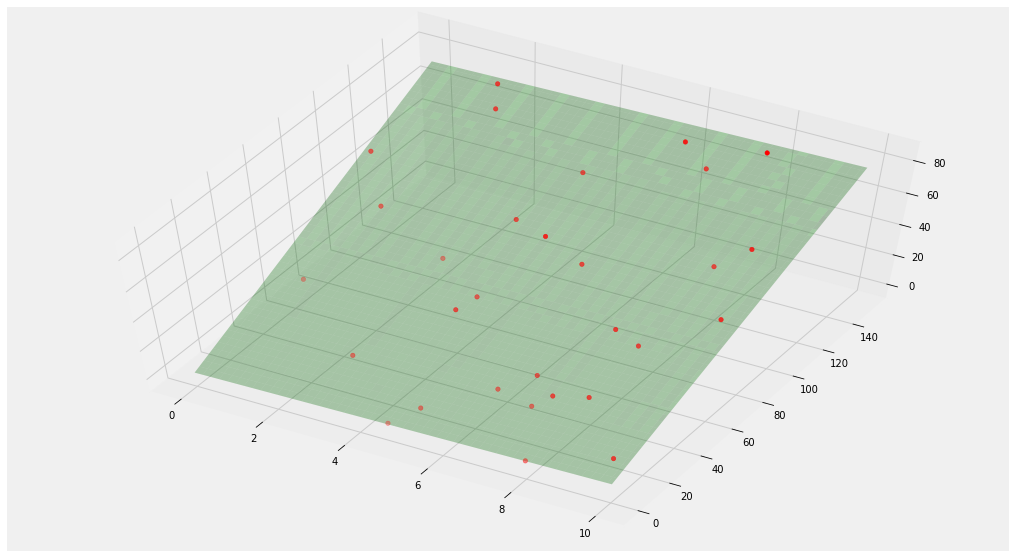

In [39]:
# %matplotlib osx

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 150, 100))
ax.scatter(xs=data_train[:, 0], ys=data_train[:, 1], zs=result_train, c='r')
ax.plot_surface(X,Y, 0.43*X + 0.5*Y + 0.67, color='green', alpha=0.3)

ax.view_init(elev=60)
plt.ion()

Теперь давайте попробуем применить к этим данным нашу линейную регрессию и с помощью неё предсказать истинный график функции:

In [90]:
print(np.array(data_train).shape, np.array(result_train).shape)
losses = grad_descent(data_train, result_train, 1e-2, 5)

(30, 2) (30,)


In [58]:
W, b

(array([3.21931669e+16, 6.15262272e+17]), array([6.1738737e+15]))

Посмотрим на график лосса:

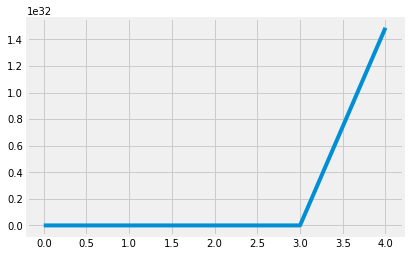

In [59]:
plt.plot(losses), losses[-1];

И на полученную разделяющую плоскость:

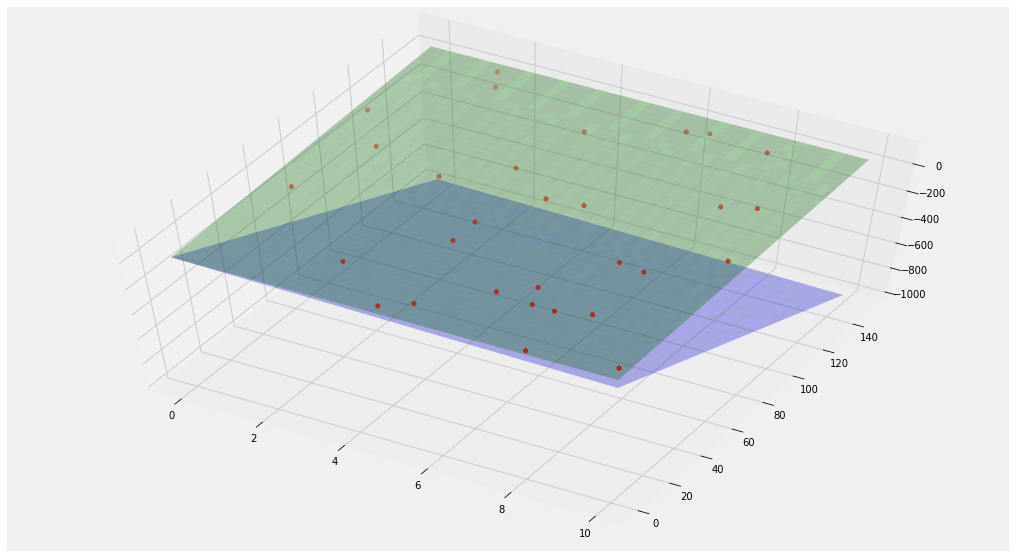

In [94]:
# %matplotlib osx

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 150, 100))
ax.scatter(xs=data_train[:, 0], ys=data_train[:, 1], zs=result_train, c='r')
ax.plot_surface(X,Y, 0.43*X + 0.5*Y + 0.67, color='green', alpha=0.3)
ax.plot_surface(X,Y, W[0]*X + W[1]*Y + b, color='blue', alpha=0.3)

ax.view_init(elev=60)

(зелёная плоскость -- истинная функция, синяя плоскость -- предсказание)

Охх, лосс и коэффициенты (W и b) нашей модели быстро уходит в небеса, и график предсказан неправильно. Почему такое происходит?

В данном случае дело в том, что признаки имеют разный *масштаб* (посмотрите на значения X и Y -- они лежат в разных диапазонах). Многие модели машинного обучения, в том числе линейные, будут плохо работать в таком случае (на самом деле это зависит от метода оптимизации, сейчас это градиентный спуск).  

Есть несколько способов **масштабирования**:
1. **Нормализация (она же стандартизация, StandardScaling)**:  

$$x_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}$$  
(j -- номер признака, i -- номер объекта)  
То есть вычитаем среднее по столбцу и делим на корень из дисперсии.

2. **Приведение к отрезку [0,1] (MinMaxScaling)**:  

$$x_{ij} = \frac{x_{ij} - \min_j}{\max_j - \min_j}$$  
(j -- номер признака, i -- номер объекта)  
То есть вычитаем минимум по столбцу и делим на разницу между минимумом и максимумом.

Используем нормализацию:

### 2.1 Нормализация

Посмотрим на среднее и разброс значений в признаках (координатах) до масштабирования:

In [95]:
data_train.mean(axis=0)

array([ 5.60526683, 70.83031083])

In [96]:
data_train.std(axis=0)

array([ 2.68995679, 45.29829861])

То есть в первом столбце у нас среднее 5.6 и среднеквадратичное отклонение 2.7, а во втором столбце среднее 70.8 и среднеквадратичное отклонение 45.3.  

Будьте внимательны: среднеквадратичное отклонение НЕ говорит о том, какой *максимальный* разброс, оно лишь указывает на числовой интервал, вероятность попадания в который у данного признака высока (то есть, например, в интервал [2.9, 8.3] в первом случае). Для большей информации смотрите [среднеквадратичное отклонение](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5) и [доверительные интервалы](https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB)

Однако факт в том, что масштаб у этих признаков разный, давайте исправим это.

**Нормализуйте признаки** так, чтобы среднее значение в каждом столбце было ~0, а стандартное отклонение ~1:

In [97]:
data_train_normalized = (data_train - data_train.mean(axis=0)) / data_train.std(axis=0)

Проверьте средние и диспресию (.std()):

In [98]:
data_train_normalized.mean(axis=0)

array([-4.69994414e-16, -3.70074342e-17])

In [99]:
data_train_normalized.std(axis=0)

array([1., 1.])

Попробуем теперь запустить регрессию с теми же параметрами lr и num_iter:

In [106]:
losses = grad_descent(data_train_normalized, result_train, 1e-2, 100)

In [107]:
W, b

(array([ 1.87360139, 22.68887552]), array([38.49038525]))

50.24060048901154


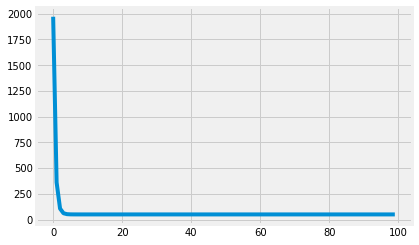

In [102]:
plt.plot(losses)
print(losses[-1]);

Мы видим, что теперь коэффициенты по модулю не огромны, градиентный спуск не взрывается и лосс стабилен!

Посмотрим на полученную плоскость:

(100, 100) (100, 100)


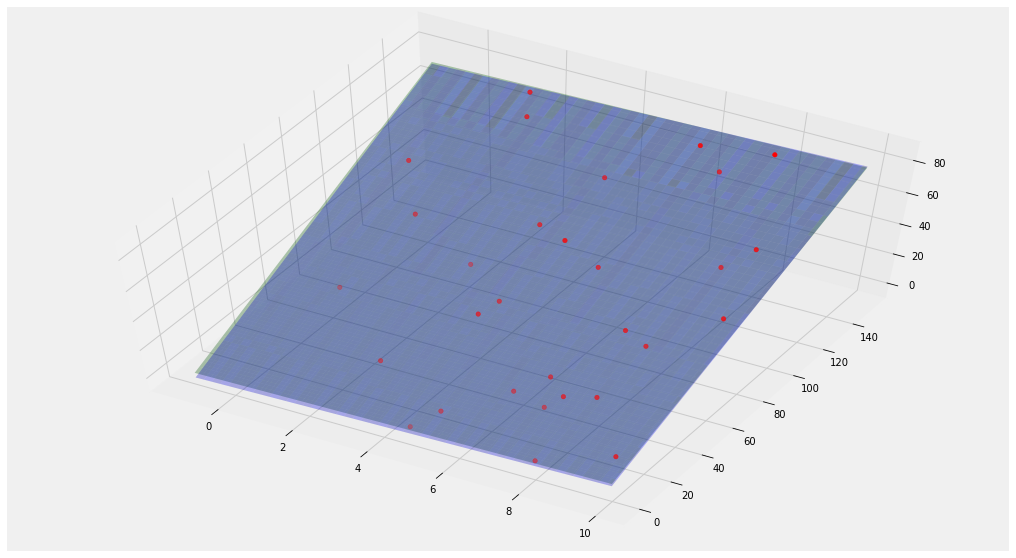

In [104]:
# %matplotlib osx

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.scatter(xs=data_train[:, 0], ys=data_train[:, 1], zs=result_train, c='r')

X, Y = np.meshgrid(np.linspace(-1, 10, 100), np.linspace(-1, 150, 100))
ax.plot_surface(X, Y, 0.43*X + 0.5*Y + 0.67, color='green', alpha=0.3)

X, Y = np.meshgrid(np.linspace(-1, 10, 100), np.linspace(-1, 150, 100))
print(np.array(X).shape, np.array(Y).shape)
# Hint: не забудьте нормализовать X и Y тоже
XX = (X - X.mean()) / X.std()
YY = (Y - Y.mean()) / Y.std()
ax.plot_surface(X, Y, W[0] * XX + W[1] * YY + b, color='blue', alpha=0.3)

ax.view_init(elev=60)
plt.ion()

#### Ответ на КР  №2

Запустите градиентный спуск на нормализованных данных с параметрами lr=1e-2, num_iter=200 и посчитайте сумму последних трех значений лосса. Полученное число, округленное до второго знака после запятой, будет ответом на второе задание кр.

In [108]:
losses = grad_descent(data_train_normalized, result_train, 1e-2, 200)
np.sum(losses[-3:])

150.72180146703462

### 2.2 Регуляризация

Помимо "сырой" линейной регресси часто используют линейную регрессию с регуляризацией -- Lasso или Ridge регрессию. Они отличаются только типом "штрафа" за большие веса: учитывать модули (Lasso) или квадраты весов (Ridge).

Учитывая, что наш лосс в этой задаче -- Mean Squared Error (MSE), в случае Ridge-регресси будет:  

$$Loss = MSE = \sum (pred_i-y_i)^2 + \alpha*\sum W_i^2$$  

А в случае Lasso-регресси будет:  

$$Loss = MSE = \sum (pred_i-y_i)^2 + \alpha*\sum |W_i|$$  


Здесь $\alpha$ -- заранее задаваемый гиперпараметр. Это вес, с которым второе слагаемое будет влиять на лосс.

Добавление регуляризации, как правило, помогает бороться с **переобучением**.

Подробнее об этом можно почитать [тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B0%D1%81%D1%81%D0%BE) и [тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B8%D0%B4%D0%B6-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).

### Полезные ссылки:
1. Открытый курс по машинному обучению: https://habr.com/company/ods/blog/323890/
2. Если вам интересно математическое обоснование всех методов, рекомендуем ознакомиться с этой книгой: https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf